# User Overview Analysis

**Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis**.

In [2]:
# packages for path locations
import os
import sys

In [3]:
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')
sys.path.append(os.path.abspath(os.path.join('scripts')))
from data_preProcessing import data_preProcessing_script

In [4]:
#importing the some libraries for the project
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the data excel sheet
pd.set_option('max_column', None)
df=pd.read_excel('../data/Week1_challenge_data_source.xlsx', na_values=['?', None])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [6]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis
& the following sub-tasks are your guidance:
* Start by identifying the top 10 handsets used by the customers.
* Then, identify the top 3 handset manufacturers
* Next, identify the top 5 handsets per top 3 handset manufacturer
* Make a short interpretation and recommendation to marketing teams

<p>In telecommunication, CDR or Call Detail Record is the voice channel and XDR is
the data channel equivalent. So here, consider xDR as data sessions Detail Record. In
xDR, user behavior can be tracked through the following applications: Social Media,
Google, Email, Youtube, Netflix, Gaming, Other.</p>

### Top 10 handsets used by the customers.

In [8]:
handsetType = df['Handset Type'].value_counts()[:10]
handsetType

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [9]:
topHandsetType = df.groupby(['Handset Type']).agg({'Handset Type': ['count']})
topHandsetType.columns = ['count']
topHandsetType = topHandsetType.reset_index()
topHandsetType.head()

,Handset Type,count
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1


In [10]:
topHandsetType = topHandsetType.nlargest(10, 'count')
topHandsetType = topHandsetType.reset_index(drop=True)
print('############################################')
print('Top 10 handsets used by customers')
print('############################################')
topHandsetType

############################################
Top 10 handsets used by customers
############################################


,Handset Type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


<AxesSubplot:xlabel='Handset Type'>

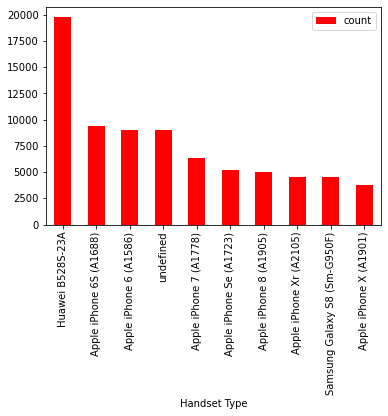

In [12]:
topHandsetType.plot.bar(x='Handset Type' ,stacked=True, color='red')

### Top 3 handset manufacturers

In [13]:
topHandsetComp = df['Handset Manufacturer'].value_counts()[:3]
topHandsetComp

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [14]:
topHandsetManu = df.groupby(['Handset Manufacturer']).agg({'Handset Manufacturer': ['count']})
topHandsetManu.columns = ['count']
topHandsetManu = topHandsetManu.reset_index()
topHandsetManu.head()

,Handset Manufacturer,count
0,A-Link Telecom International Co Limited,8
1,ASUSTeK,23
2,Acer,14
3,Adar,1
4,Alif Communications,1


In [15]:
topHandsetManu = topHandsetManu.nlargest(3, 'count')
topHandsetManu = topHandsetManu.reset_index(drop=True)
print('############################################')
print('Top 3 handsets Manufacturer')
print('############################################')
topHandsetManu

############################################
Top 3 handsets Manufacturer
############################################


,Handset Manufacturer,count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


<AxesSubplot:xlabel='Handset Manufacturer'>

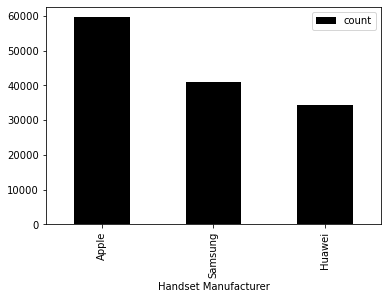

In [18]:
topHandsetManu.plot.bar(x='Handset Manufacturer' , stacked=True, color='black')

### Top 5 handsets per top 3 handset manufacturer

In [27]:
appleTop = df.loc[df['Handset Manufacturer'] == 'Apple']
appleTop = appleTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
appleTop.columns = ['count']
appleTop=appleTop.nlargest(5, 'count')
appleTop

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9419
                     Apple iPhone 6 (A1586)    9023
                     Apple iPhone 7 (A1778)    6326
                     Apple iPhone Se (A1723)   5187
                     Apple iPhone 8 (A1905)    4993

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

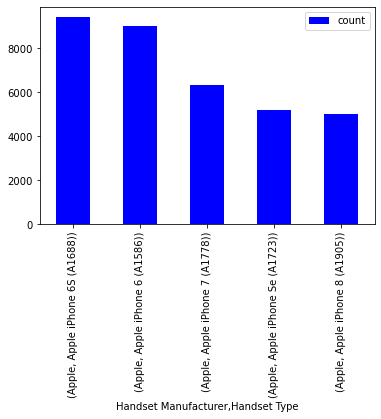

In [30]:
appleTop.plot.bar(y='count', stacked=True, color='blue')

In [31]:
samTop = df.loc[df['Handset Manufacturer'] == 'Samsung']
samTop = samTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
samTop.columns = ['count']
samTop=samTop.nlargest(5, 'count')
samTop

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4520
                     Samsung Galaxy A5 Sm-A520F     3724
                     Samsung Galaxy J5 (Sm-J530)    3696
                     Samsung Galaxy J3 (Sm-J330)    3484
                     Samsung Galaxy S7 (Sm-G930X)   3199

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

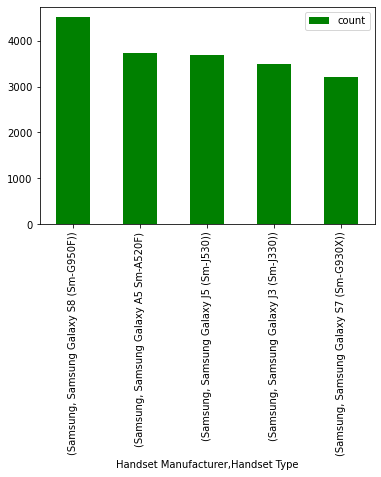

In [32]:
samTop.plot.bar(y='count', stacked=True, color='green')

In [33]:
huwTop = df.loc[df['Handset Manufacturer'] == 'Huawei']
huwTop = huwTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
huwTop.columns = ['count']
huwTop=huwTop.nlargest(5, 'count')
huwTop

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19752
                     Huawei E5180                     2079
                     Huawei P20 Lite Huawei Nova 3E   2021
                     Huawei P20                       1480
                     Huawei Y6 2018                    997

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

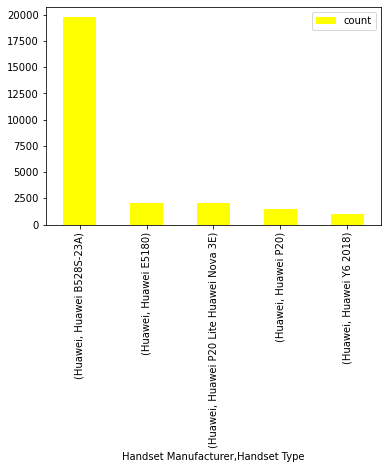

In [34]:
huwTop.plot.bar(y='count', stacked=True, color='yellow')

In [64]:
top5 = df.loc[:,['Handset Type','Handset Manufacturer']]
value = top5.groupby(['Handset Manufacturer', 'Handset Type']).size()
topList = pd.Series(dtype='object')
for i in topHandsetComp.index:
    topList = topList.append(value[i])
top5List = topList.sort_values(ascending=False)[:5]

In [65]:
top5List

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
dtype: int64

<AxesSubplot:>

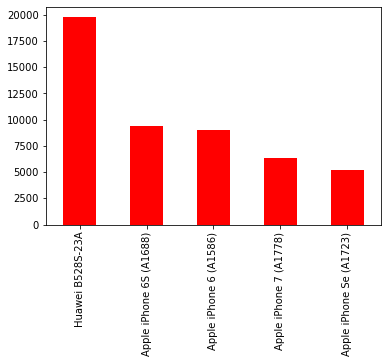

In [67]:
top5List.plot.bar(y='count', stacked=True, color='red')

**Apple**, **Samsung**, and **Huawei** phones are among the most popular on the network, 
accounting for 134,827 users. Hwawei B528S-23A is the most popular phone, accounting 
for 19752 units. Apple iPhone 6S, 6, 7, and Se are the next 4 big popular phones after Huawei. Users prefer the Huawei B528S-23A, so we know that selling more and similar Huawei phones, running promotions one of their similar product will account for success in future busenesses. We can also infer that iPhones will be the next commonly used phones, and we can use similar marketing or business strategies to them.

### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.
* Aggregate per user the following information in the column number of xDR sessions
* Session duration
* the total download (DL) and upload (UL) data
* the total data volume (in Bytes) during this session for each application